In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
titanic_train=pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.shape

(891, 12)

In [5]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<BarContainer object of 2 artists>

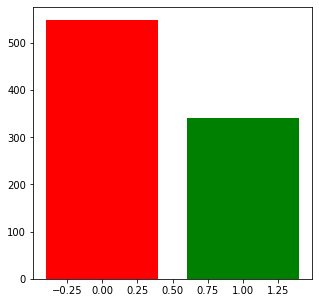

In [6]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()), color=["r", "g"])

In [7]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

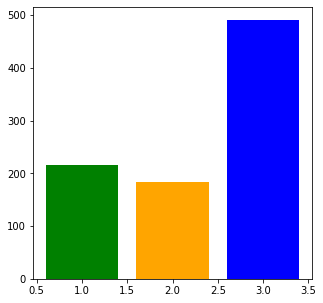

In [8]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color=["blue","green","orange"])
plt.show()

In [9]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

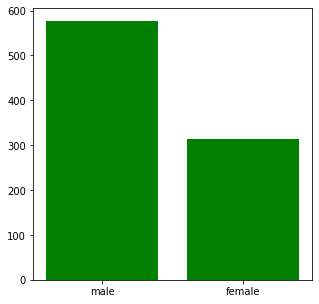

In [10]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()),color="Green")
plt.show()

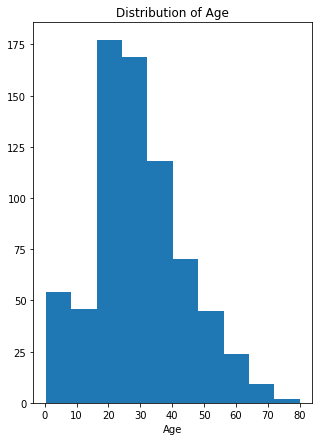

In [11]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()

In [12]:
sum(titanic_train['Survived'].isnull())

0

In [13]:
titanic_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [14]:
titanic_train=titanic_train.dropna()

In [15]:
#building model

In [16]:
sum(titanic_train['Survived'].isnull())

0

In [17]:
sum(titanic_train['Age'].isnull())

0

In [18]:
x_train=titanic_train[['Age']]
y_train=titanic_train[['Survived']]

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtc = DecisionTreeClassifier()

In [21]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
#Predicting Values

In [23]:
sum(titanic_test['Age'].isnull())

86

In [24]:
titanic_test=titanic_test.dropna()

In [25]:
sum(titanic_test['Age'].isnull())

0

In [26]:
x_test=titanic_test[['Age']]

In [27]:
y_pred=dtc.predict(x_test)

In [28]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [29]:
y_pred.shape

(87,)

In [30]:
data_frame = pd.DataFrame(y_pred)

In [31]:
data_frame

,0
0,1
1,0
2,1
3,1
4,1
...,...
82,1
83,0
84,0
85,0


In [32]:
data_frame.to_csv("submission.csv")

In [33]:
#https://www.kaggle.com/code/arund8888/titanic-classification-models-score-73#6)Exploratory-Data-Analysis-